In [26]:
from google.cloud import bigquery
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file(
    "My First Project-801cca1315e6_3.json",
    scopes=["https://www.googleapis.com/auth/cloud-platform"],
)
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id,
)

hn_dataset_ref = client.dataset('hacker_news', project='bigquery-public-data')

hn_dset = client.get_dataset(hn_dataset_ref)

[x.table_id for x in client.list_tables(hn_dset)]

['comments', 'full', 'full_201510', 'stories']

In [27]:
!ls

 explore.ipynb				'My First Project-801cca1315e6_3.json'
 LICENSE				'My First Project-801cca1315e6.json'
'My First Project-801cca1315e6_2.json'	 README.md


In [37]:
df = client.query("""
SELECT *
FROM `bigquery-public-data.hacker_news.comments`
ORDER BY time DESC
LIMIT 1600000;
""").result().to_dataframe()

In [38]:
df.tail()

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
1599995,8432460,jaoued,jaoued,1412864148,2014-10-09 14:15:48+00:00,You dont want to read french comments either.,8427976,None,None,2
1599996,8432459,dmix,dmix,1412864128,2014-10-09 14:15:28+00:00,There are plenty. Here are a few off the top o...,8432424,None,None,0
1599997,8432458,Someone1234,Someone1234,1412864106,2014-10-09 14:15:06+00:00,Is this an advert for Sensor Tower? Certainly ...,8431622,None,None,0
1599998,8432457,jemfinch,jemfinch,1412864105,2014-10-09 14:15:05+00:00,You just started a few months ago; how would y...,8431951,None,None,1
1599999,8432455,GrinningFool,GrinningFool,1412864094,2014-10-09 14:14:54+00:00,"&quot;Debt is a contractual issue, not a moral...",8428388,None,None,1


In [39]:
import numpy as np

for ix, df_i in  enumerate(np.array_split(df, 12)):
    df_i.to_csv(f'hn_{ix}.csv')

In [30]:
!ls -lh hn.csv

-rwxrwxrwx 1 cowley cowley 232M Feb 29 15:26 hn.csv


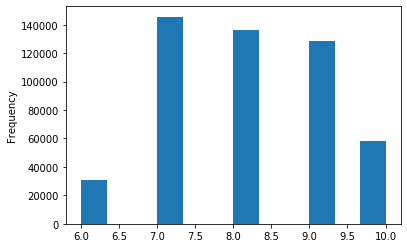

In [14]:
df["time_ts"].dt.month.plot(kind="hist", bins=12)

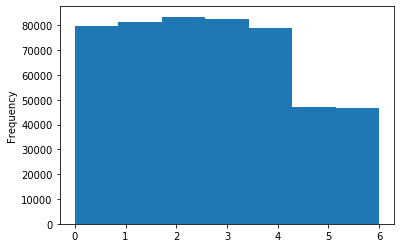

In [17]:
df["time_ts"].dt.weekday.plot(kind="hist", bins=7)

In [19]:
df["author"].value_counts().head(25)

dang             1994
tptacek          1441
dragonwriter     1340
DanBC            1316
greenyoda        1156
nickpsecurity    1126
mikeash          1066
TeMPOraL          915
toomuchtodo       893
coldtea           883
icebraining       866
vezzy-fnord       828
JoeAltmaier       778
Animats           752
jacquesm          715
MichaelGG         684
agumonkey         681
jsprogrammer      678
pjc50             677
pjmlp             660
kuschku           610
dalke             610
brudgers          600
userbinator       594
JoshTriplett      577
Name: author, dtype: int64

In [20]:
df["parent"].value_counts().head(25)

9812245     902
9996333     850
10152809    733
10311580    645
10360911    215
9996335     200
10152811    199
10037157    163
9812247     154
10226196    152
10339388    146
9784008     122
10312938    118
9812246     116
10080065    116
10347821    115
10117297    114
10311582    109
9966118     104
10170089    103
10027102    103
10272098    101
10153164    100
10311581     99
9996334      98
Name: parent, dtype: int64

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


vect = TfidfVectorizer(stop_words="english", ngram_range=(1, 2))
rfc = RandomForestClassifier


pipe = Pipeline([
    ("vect", vect),
    ("clf", rfc),
])

data = df["comments"]

TypeError: __init__() got an unexpected keyword argument 'stopwords'